In [1]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
def f(c, max_n = 255):
    n = 0
    z = 0 + 0j

    while n < max_n:
        z = z**2 + c
        n += 1
        if abs(z) > 2:
            return n
    return n

In [3]:
x_min, x_max = -2, 1
y_min, y_max = -1, 1

dx = 1e-3
dy = 1e-3

num_x = int((x_max - x_min) / dx)
num_y = int((y_max - y_min) / dy)

In [4]:
img = np.zeros((num_y, num_x), dtype='uint8')

In [5]:
x = x_min
y = y_min

for i in tqdm(range(num_y)):
    for j in range(num_x):
        x += dx
        img[i][j] = f(x + y*1j)
    x = x_min
    y += dy

100%|██████████| 2000/2000 [04:14<00:00,  7.86it/s]


In [27]:
def _id(x):
    return x

def colormap(img, plt_cmap, scaler=_id):
    img_color = plt_cmap(scaler(img))[:, :, :3]

    return (img_color * 255).astype(np.uint8)

In [28]:
cm = plt.get_cmap('plasma')

img_color = colormap(img, cm, np.log)

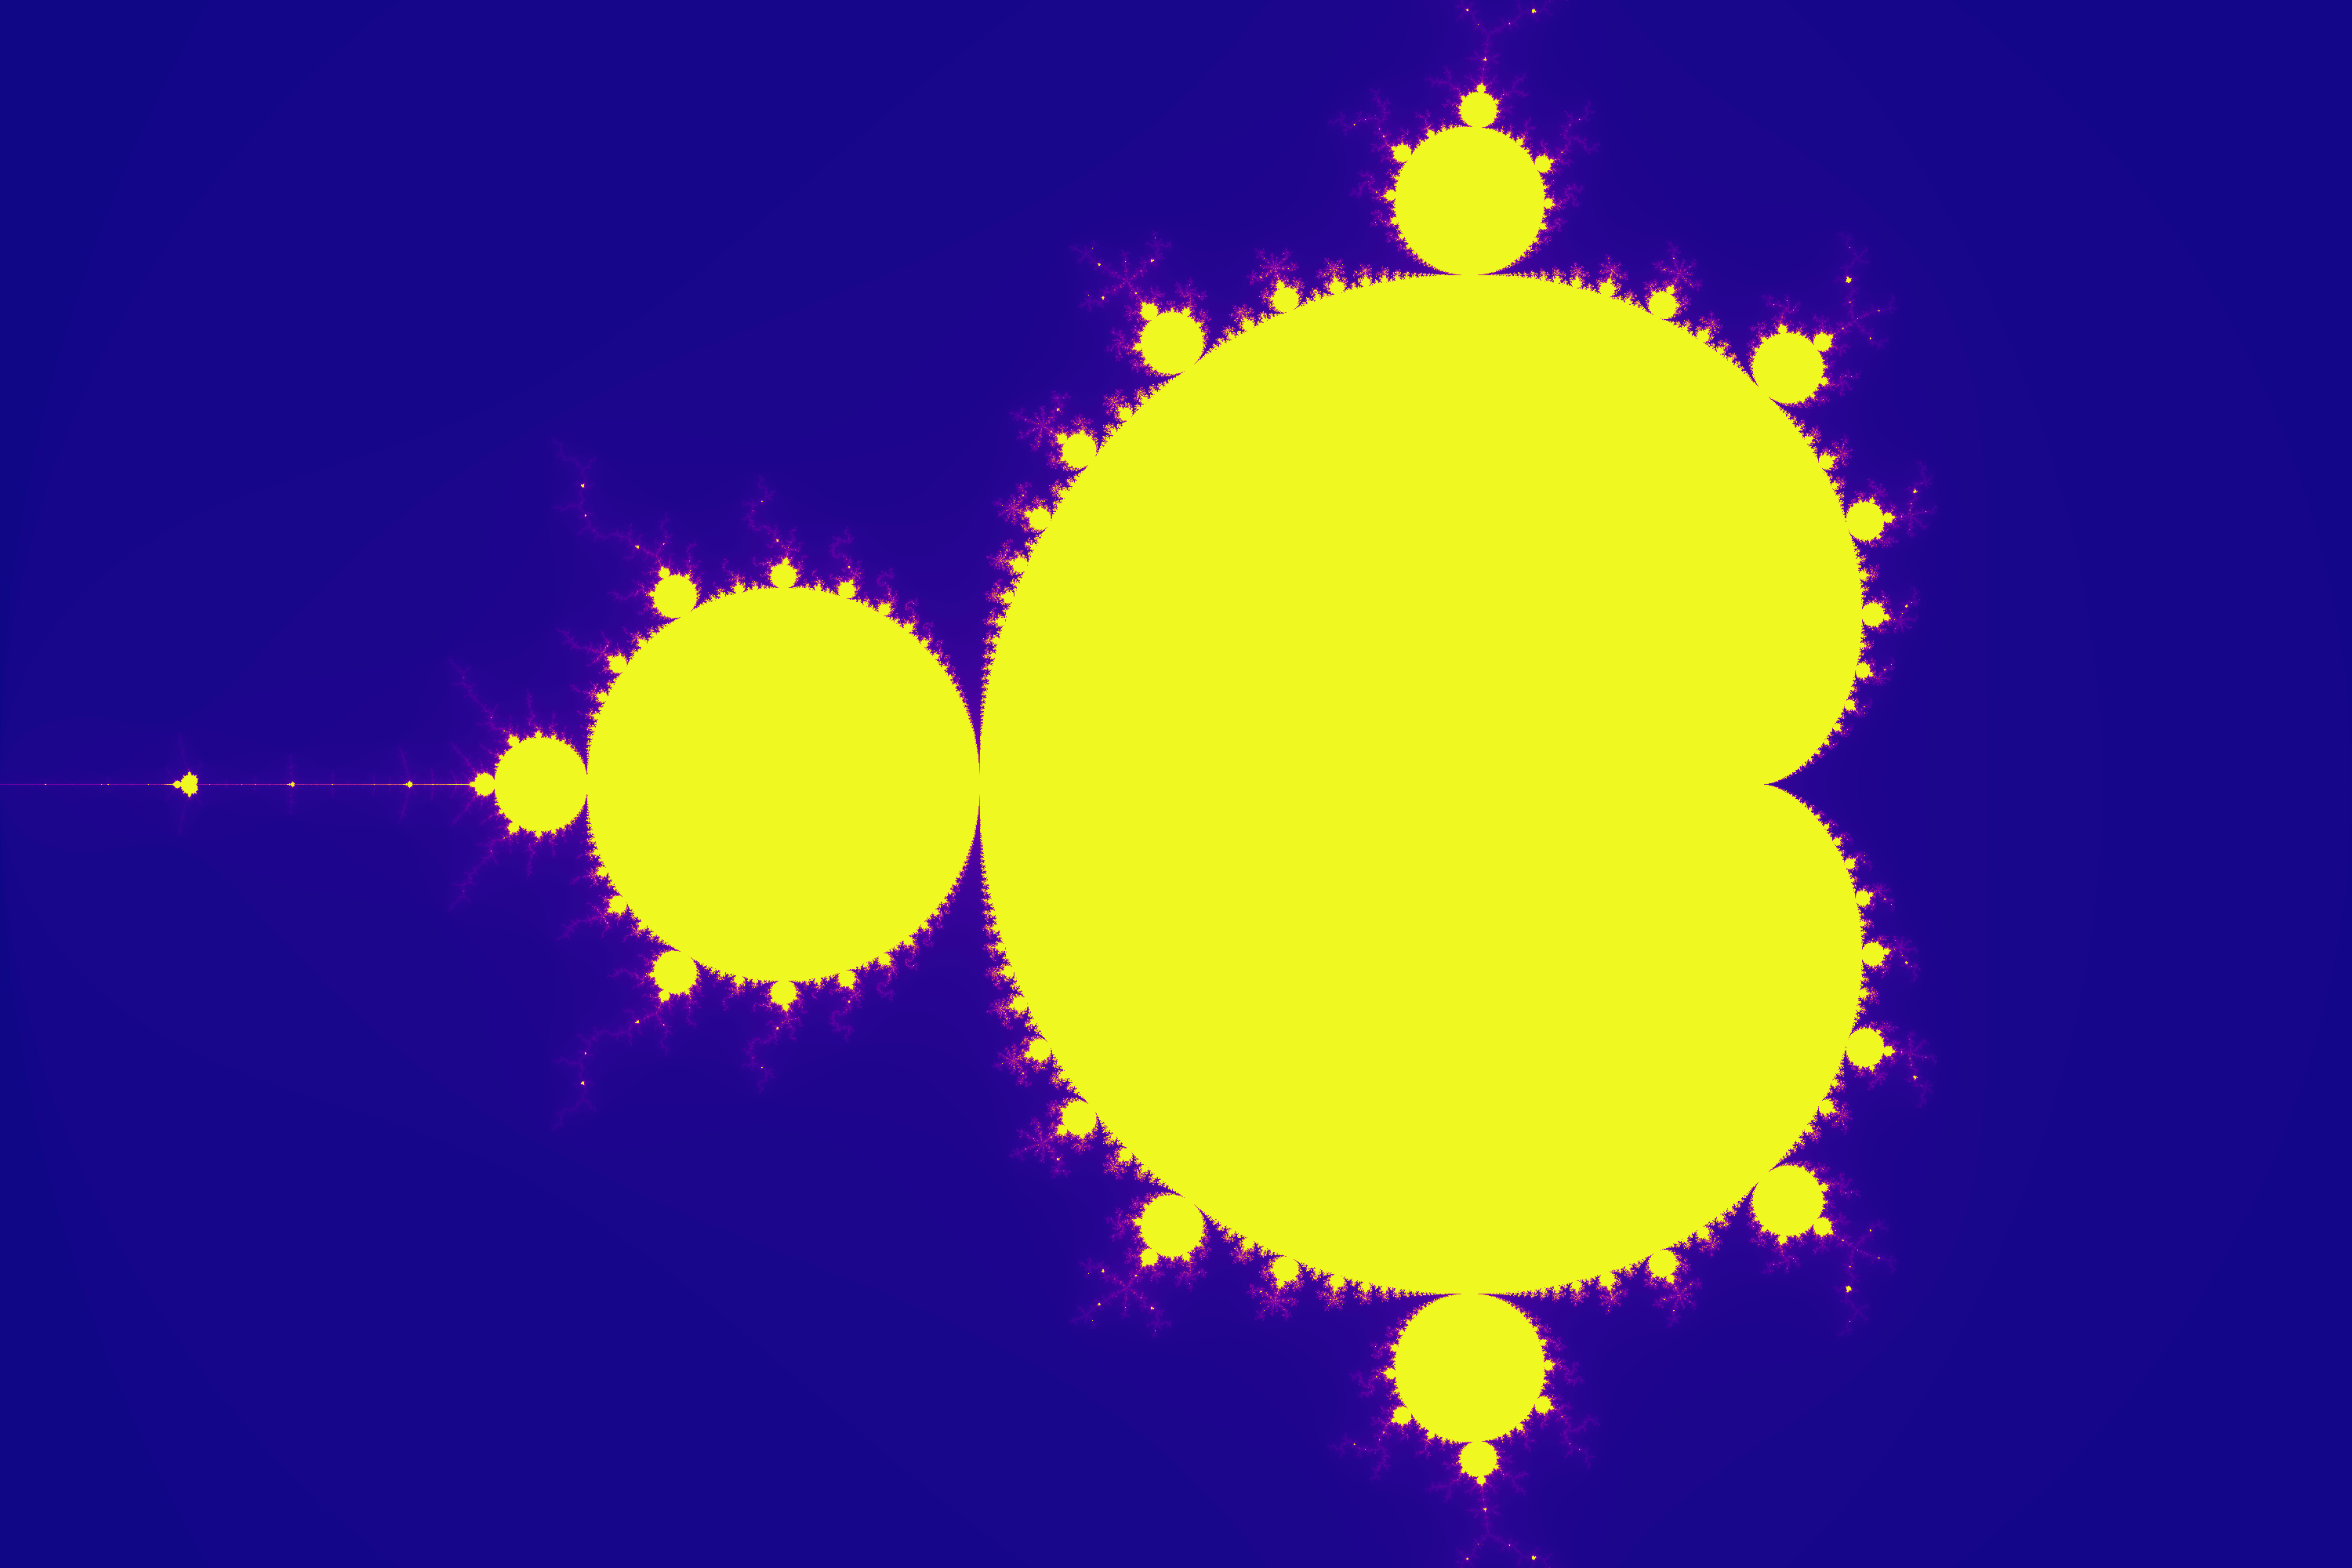

In [29]:
pil_img = Image.fromarray(img_color)
display(pil_img)

pil_img.save(f'./mandelbrot_{num_x}_{num_y}.png')